### Finding Common Charges

The goal of this exercise is to find the most common charges seen when the beam is on. 

This will involve: 
1. pulling data from the accelerator during beam time for the PV "TORO:GUNB:360:CHRG"
2. identify clusters with an algorithm
3. plot bar chart of clusters with pC as the y-axis

### Cluster finding algorithm ###
- sort all charge values
- start with first value and calculate the tolerance amount 
- for each following value, check if it's within the tolerance amount. If it is, add to a cluster list. If not, create a new list, add it to that, and let it be the new comparison. 
- repeat the previous step with this new comparison point
- repeat until all datapoints have been emptied from the dataset

In [130]:
def cluster(vals, tolerance) -> list: 
    vals.sort()

    clusters = [[]]
    cluster_index = 0
    while len(vals) > 0:
        comparison = vals.pop(0)
        clusters[cluster_index].append(comparison)
        for i in range(len(vals)):
            next_val = vals.pop(0)
            if abs(next_val - comparison) <= (tolerance * comparison):  # if next_val is within percentage of comparison's value
                clusters[cluster_index].append(next_val)  # add next_val to cluster
            else:
                cluster_index += 1
                clusters.append([])  # add a new empty list
                clusters[cluster_index].append(next_val)  # add next_val to the next cluster
                break

    return clusters

In [131]:
def cluster_revised(vals, tolerance) -> list:
    vals.sort()

    clusters = [[]]
    cluster_index = 0
    comparison = vals.pop(0)
    while len(vals) > 0:
        clusters[cluster_index].append(comparison)
        for i in range(len(vals)):
            next_val = vals.pop(0)
            if abs(next_val - comparison) <= (tolerance * comparison):  # if next_val is within percentage of comparison's value
                clusters[cluster_index].append(next_val)  # add next_val to cluster
            else:
                cluster_index += 1
                clusters.append([])  # add a new empty list
                clusters[cluster_index].append(next_val)  # add next_val to the next cluster
                comparison = next_val
                break

    return clusters

In [132]:
# def cluster(vals, tolerance) -> list:
#     """Groups charge values together within the given tolerance percentage (between 0 and 1)"""
#     vals.sort()
# 
#     clusters = [[]]
#     cluster_ind = 1
# 
#     # add values within tolerance percentage of the first value
#     first_val = vals[0]
#     max_first = first_val + (tolerance * first_val)
#     curr_ind = 0
#     while vals[curr_ind] <= max_first:
#         clusters[0].append(vals[curr_ind])
#         curr_ind += 1
#     
#     # create a tolerance margin above some middle point and add points to the left and right on a number line
#     while len(vals) > 0 and not curr_ind >= len(vals) - 1:
#         curr_val = vals[curr_ind]
#         comparison = curr_val + (tolerance * curr_val)
#         clusters.append([])
#         while abs(comparison - curr_val) <= tolerance * comparison: # check if within tolerance range
#             clusters[cluster_ind].append(curr_val)
#             curr_ind += 1
#             if curr_ind >= len(vals):
#                 break
#             curr_val = vals[curr_ind]
#         cluster_ind += 1
# 
#     return clusters

In [133]:
# cluster algorithm demo
val_tolerance = 0.05
vals_unsorted = [100.0, 100.5, 100.2, 99.8, 100.4, 100.1, 100.3, 
                 110.0, 109.5, 109.8, 109.9, 110.2, 109.7, 110.1, 
                 120.0, 119.5, 119.8, 119.9, 120.2, 119.7, 120.1, 
                 130.0, 130.5, 130.2, 129.8, 130.4, 130.1, 130.3, 
                 150.0, 149.5, 149.8, 149.9, 150.2, 149.7, 150.1, 
                 200.0, 199.5, 199.8, 199.9, 200.2, 199.7, 200.1, 
                 300.0, 300.5, 300.2, 299.8, 300.4, 300.1, 300.3,
                 400.0, 399.5, 399.8, 399.9, 400.2, 399.7, 400.1,
                 600.0, 600.5, 600.2, 599.8, 600.4, 600.1, 600.3,
                 800.0, 799.5, 799.8, 799.9, 800.2, 799.7, 800.1,
                 1000.0, 1000.5, 1000.2, 999.8, 1000.4, 1000.1, 1000.3,
                 1600.0, 1599.5, 1599.8, 1599.9, 1600.2, 1599.7, 1600.1,
                 2500.0, 2500.5, 2500.2, 2499.8, 2500.4, 2500.1, 2500.3,
                 3500.0, 3499.5, 3499.8, 3499.9, 3500.2, 3499.7, 3500.1,
                 5000.0, 5000.5, 5000.2, 4999.8, 5000.4, 5000.1, 5000.3,
                 8000.0, 7999.5, 7999.8, 7999.9, 8000.2, 7999.7, 8000.1]
print(cluster_revised(vals_unsorted, val_tolerance))

[[99.8, 100.0, 100.1, 100.2, 100.3, 100.4, 100.5], [109.5, 109.5, 109.7, 109.8, 109.9, 110.0, 110.1, 110.2], [119.5, 119.5, 119.7, 119.8, 119.9, 120.0, 120.1, 120.2], [129.8, 129.8, 130.0, 130.1, 130.2, 130.3, 130.4, 130.5], [149.5, 149.5, 149.7, 149.8, 149.9, 150.0, 150.1, 150.2], [199.5, 199.5, 199.7, 199.8, 199.9, 200.0, 200.1, 200.2], [299.8, 299.8, 300.0, 300.1, 300.2, 300.3, 300.4, 300.5], [399.5, 399.5, 399.7, 399.8, 399.9, 400.0, 400.1, 400.2], [599.8, 599.8, 600.0, 600.1, 600.2, 600.3, 600.4, 600.5], [799.5, 799.5, 799.7, 799.8, 799.9, 800.0, 800.1, 800.2], [999.8, 999.8, 1000.0, 1000.1, 1000.2, 1000.3, 1000.4, 1000.5], [1599.5, 1599.5, 1599.7, 1599.8, 1599.9, 1600.0, 1600.1, 1600.2], [2499.8, 2499.8, 2500.0, 2500.1, 2500.2, 2500.3, 2500.4, 2500.5], [3499.5, 3499.5, 3499.7, 3499.8, 3499.9, 3500.0, 3500.1, 3500.2], [4999.8, 4999.8, 5000.0, 5000.1, 5000.2, 5000.3, 5000.4, 5000.5], [7999.5, 7999.5, 7999.7, 7999.8, 7999.9, 8000.0, 8000.1, 8000.2]]


In [134]:
# pull TORO:GUNB:360:CHRG data from the accelerator and convert to a list of charges

# imports
import sys
sys.path.append('/Users/jonathontordilla/Desktop/hombom24/archive-analysis/lcls-tools-plots/lcls_tools') # path to tools 
import common.data_analysis.archiver as arch # type: ignore
from datetime import datetime
# specify timeframe with a datetime object
start_date = "2024/07/02 14:42:36"
end_date = "2024/07/02 15:42:36" 
format_string = "%Y/%m/%d %H:%M:%S"
start_date_obj = datetime.strptime(start_date, format_string)
end_date_obj = datetime.strptime(end_date, format_string)
# submit request with a list of PVs
data = arch.get_values_over_time_range(["TORO:GUNB:360:CHRG"], start_date_obj, end_date_obj)
chrg_dict = data["TORO:GUNB:360:CHRG"]
chrg_vals = chrg_dict.values # list 
print(chrg_vals)

[0.6768124103546143, 0.6533117890357971, 0.512330949306488, 0.5097566246986389, 0.5277981758117676, 0.4050768315792084, 0.5111626386642456, 0.38964012265205383, 0.4690616726875305, 0.40671783685684204, 0.014045698568224907, 0.4431437849998474, 0.38937631249427795, 0.48151662945747375, 0.5798130631446838, 0.5018803477287292, 0.2573322653770447, 0.29974523186683655, 0.4080764353275299, 0.023350529372692108, 0.034061793237924576, 0.020000746473670006, 0.03506116196513176, 0.023521985858678818, 0.022689834237098694, 0.04380612075328827, 0.03397207707166672, 0.050164856016635895, 0.03249223902821541, 0.008525515906512737, 0.014801925048232079, 0.018107909709215164, 0.02968299202620983, 0.013969103805720806, 0.011262034066021442, 0.02021060883998871, 0.02111533284187317, 0.016757717356085777, 0.013478212989866734, 0.021267838776111603, 0.011468281038105488, 0.03072083368897438, 0.03951516002416611, 0.013428720645606518, 0.01464989222586155, 0.028411803767085075, 0.026864130049943924, 0.02311

In [135]:
# cluster and print charge data
charge_tolerance = 2
charge_clusters = cluster_revised(chrg_vals, charge_tolerance)
print(charge_clusters[3]) # example of a cluster of similar charge values
len(charge_clusters) # number of clusters from the dataset

[1.8355177640914917, 1.8355177640914917, 1.8370460271835327, 1.8384126424789429, 1.8493149280548096, 1.8540630340576172, 1.858388066291809, 1.8749676942825317, 1.8807686567306519, 1.8852016925811768, 1.889723539352417, 1.8929755687713623, 1.8960075378417969, 1.9042555093765259, 1.9187241792678833, 1.9242119789123535, 1.9253219366073608, 1.9398808479309082, 1.9449751377105713, 1.9488855600357056, 1.9534300565719604, 1.9592853784561157, 1.9607316255569458, 1.9626384973526, 1.9648114442825317, 1.9649564027786255, 1.9724652767181396, 1.9911580085754395, 2.0012478828430176, 2.0015969276428223, 2.0038676261901855, 2.0051426887512207, 2.01473331451416, 2.018348217010498, 2.0287957191467285, 2.0351483821868896, 2.036937952041626, 2.0456860065460205, 2.0464577674865723, 2.0477852821350098, 2.0563409328460693, 2.056354284286499, 2.0590898990631104, 2.0605831146240234, 2.0606839656829834, 2.063951015472412, 2.0760247707366943, 2.082435131072998, 2.0937225818634033, 2.1275641918182373, 2.132405042

5

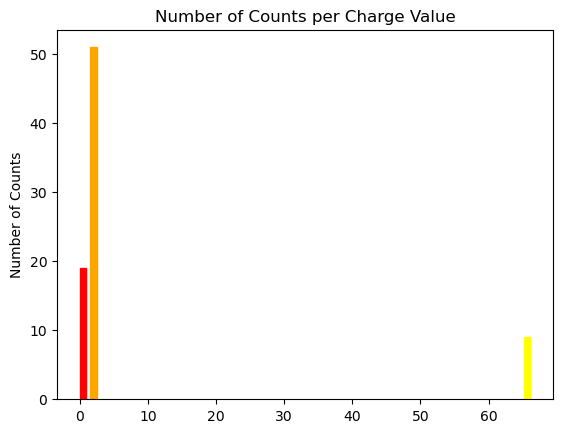

In [136]:
# plot a bar chart of clusters
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()

# filter out charge values less than 0.1 and greater than 3.0
plot_charge_clusters = [cluster for cluster in charge_clusters if 0.1 < float(np.mean(cluster))]

# 
values = [float(np.mean(plot_charge_clusters[i])) for i in range(len(plot_charge_clusters))] 
counts = [len(plot_charge_clusters[i]) for i in range(len(plot_charge_clusters))]

bars = ax.bar(values, counts, width=1)
colors = ["red", "orange", "yellow", "green", "blue", "violet"]
for i in range(len(bars)):
    bars[i].set_color(colors[i % len(colors)])

ax.set_ylabel('Number of Counts')
ax.set_title('Number of Counts per Charge Value')
plt.show()

In [140]:
# get the identifying charges from each cluster: 

charge_vals = [charge_group[0] for charge_group in charge_clusters]
charge_vals

[0.007796282414346933,
 0.02339313179254532,
 0.2573322653770447,
 1.8355177640914917,
 63.75201416015625]

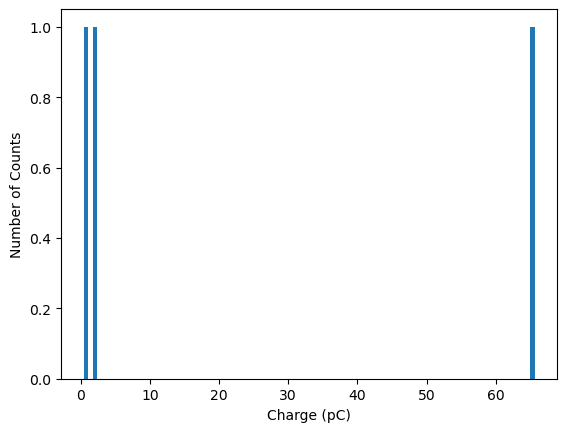

In [138]:
fig, ax = plt.subplots()

values = [float(np.mean(plot_charge_clusters[i])) for i in range(len(plot_charge_clusters))] 
counts = [len(plot_charge_clusters[i]) for i in range(len(plot_charge_clusters))]

ax.hist(values, bins=100)
ax.set_ylabel('Number of Counts')
ax.set_xlabel('Charge (pC)')
plt.show()

In [139]:
print(values)

[0.4568360730221397, 1.972912538285349, 65.65282101101346]
